In [ ]:
from utils import createObservationsSpacerocks, createRandomObjects, count_lines
from config import HELIO_PATH
import destnosim

In [ ]:
size = 100
t = 25
mjd_list = [t + 60676 for t in [0.5, 0.6, 7.5, 7.6, 13.5, 13.6]]

In [ ]:
objs = createRandomObjects(size)
objs

In [ ]:
pop = destnosim.ElementPopulation(objs, t)
dets = createObservationsSpacerocks(pop, mjd_list)

In [ ]:
dets

In [ ]:
dets.write("./temp/dets.csv", overwrite=True)

In [ ]:
earth_file = HELIO_PATH / "tests/Earth1day2020s_02a.txt"
obs_file = HELIO_PATH / "tests/ObsCodes.txt"
colformat_file = "colformat.txt"
out_pairdets_file = "./temp/pairdets.csv"
out_pairs_file = "./temp/pairs.csv"

In [ ]:
from helio import run_make_tracklets
run_make_tracklets("./temp/dets.csv", earth_file, obs_file, colformat_file, out_pairdets_file, out_pairs_file)

In [ ]:
with open(out_pairdets_file) as f:
    lines = f.readlines()
    pairdets_len = len(lines) - 1

pairs_len = count_lines(out_pairs_file)

print(f"Number of lines in pairdets.csv: {pairdets_len}")
print(f"Number of lines in pairs.csv: {pairs_len}")
pair_coverage = pairs_len / (size * len(mjd_list) / 2)
print(f"Pair coverage: {pair_coverage}")

In [2]:
from start import *
import pandas as pd
helio_extracted = pd.read_feather(out_hl_extracted_file)

In [8]:
helio_extracted[helio_extracted['idstring'] == 1]

,idstring,clusternum,heliodist,heliovel,helioacc
20072,1,20073,23.055,0.000,-0.0
20291,1,20292,23.055,0.000,-0.0
20826,1,20827,24.053,-3.463,-0.0
21017,1,21018,24.053,-3.463,-0.0
21201,1,21202,24.053,0.000,-0.0
...,...,...,...,...,...
35322,1,35323,37.027,0.000,-0.0
35495,1,35496,37.027,3.463,-0.0
35630,1,35631,37.027,3.463,-0.0
36013,1,36014,38.024,0.000,-0.0


(array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2.],
        [2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 2., 0., 2., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 2., 0., 2., 0., 0.]]),
 array([ 7.088     ,  7.67008333,  8.25216667,  8.83425   ,  9.41633333,
         9.99841667, 10.5805    , 11.16258333, 11.74466667, 12.32675   ,
        12.90883333, 13.49091667, 14.073     ]),
 array([-1.21200000e+01, -1.03885833e+01, -8.65716667e+00, -6.92575000e+00,
        -5.19433333e+00, -3.462

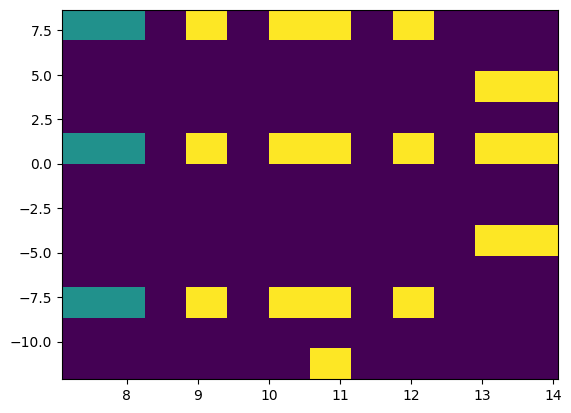

In [19]:
import matplotlib.pyplot as plt
dist = helio_extracted[helio_extracted['idstring'] == 3].iloc[:, 2]
vel = helio_extracted[helio_extracted['idstring'] == 3].iloc[:, 3]
plt.hist2d(dist, vel, bins=12)

In [17]:
objTable = pd.read_feather(object_table_file)
objTable[objTable['ObjID'] == 4]

,ObjID,helioDist,helioVel,helioAcc
0,0,40.659220,-0.000303,-1.939129e-09
1,1,32.536460,0.000751,-1.104753e-07
2,2,41.393112,-0.001480,-5.767940e-08
3,3,12.869938,-0.002849,2.210944e-07
4,4,59.998567,-0.000244,-9.471558e-09
...,...,...,...,...
795,795,55.929986,-0.000012,-1.243388e-08
796,796,39.334077,-0.002473,-8.968995e-08
797,797,13.889625,-0.000319,2.813367e-07
798,798,18.169668,0.002261,-4.192750e-07


In [24]:
helio_extracted.size / helio_extracted['idstring'].unique().size

337.555720653789